# 체크카드_ANN+StandardScaler

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터 불러오기
data = pd.read_excel('bank_pre.xlsx')

In [2]:
# 데이터 형태와 결측치 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   해외 거주 여부       300000 non-null  int64  
 1   성별             300000 non-null  int64  
 2   나이             300000 non-null  int64  
 3   신규 고객(6개월 이내)  300000 non-null  int64  
 4   거래 누적 기간(월)    300000 non-null  int64  
 5   지역 코드          300000 non-null  int64  
 6   고객 활성화 상태      300000 non-null  int64  
 7   가구 소득          300000 non-null  float64
 8   고객 구분          300000 non-null  int64  
 9   특별계좌           300000 non-null  int64  
 10  온라인 계좌         300000 non-null  int64  
 11  체크카드           300000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 27.5 MB


In [3]:
# 입력 변수와 출력 변수 분리
X = data.drop(columns=['특별계좌', '온라인 계좌', '체크카드'])
y = data[['체크카드']]

In [4]:
# 데이터를 훈련용과 검증용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
from sklearn.preprocessing import StandardScaler

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# 모델 설계
from tensorflow.keras.models import Sequential
model = Sequential()

model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
from keras.callbacks import EarlyStopping

# EarlyStopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=64, callbacks=[early_stopping])


Epoch 1/100
3750/3750 [==============================] - 13s 3ms/step - loss: 0.3234 - accuracy: 0.8749 - val_loss: 0.3113 - val_accuracy: 0.8773
Epoch 2/100
3750/3750 [==============================] - 10s 3ms/step - loss: 0.3124 - accuracy: 0.8786 - val_loss: 0.3105 - val_accuracy: 0.8789
Epoch 3/100
3750/3750 [==============================] - 10s 3ms/step - loss: 0.3098 - accuracy: 0.8797 - val_loss: 0.3074 - val_accuracy: 0.8790
Epoch 4/100
3750/3750 [==============================] - 10s 3ms/step - loss: 0.3086 - accuracy: 0.8800 - val_loss: 0.3068 - val_accuracy: 0.8795
Epoch 5/100
3750/3750 [==============================] - 10s 3ms/step - loss: 0.3076 - accuracy: 0.8804 - val_loss: 0.3051 - val_accuracy: 0.8797
Epoch 6/100
3750/3750 [==============================] - 8s 2ms/step - loss: 0.3068 - accuracy: 0.8804 - val_loss: 0.3060 - val_accuracy: 0.8794
Epoch 7/100
3750/3750 [==============================] - 9s 2ms/step - loss: 0.3064 - accuracy: 0.8805 - val_loss: 0.3042 - v

Epoch 57/100
3750/3750 [==============================] - 17s 5ms/step - loss: 0.2950 - accuracy: 0.8821 - val_loss: 0.2978 - val_accuracy: 0.8814
Epoch 58/100
3750/3750 [==============================] - 16s 4ms/step - loss: 0.2953 - accuracy: 0.8821 - val_loss: 0.2974 - val_accuracy: 0.8803
Epoch 59/100
3750/3750 [==============================] - 16s 4ms/step - loss: 0.2948 - accuracy: 0.8822 - val_loss: 0.2983 - val_accuracy: 0.8807
Epoch 60/100
3750/3750 [==============================] - 16s 4ms/step - loss: 0.2947 - accuracy: 0.8823 - val_loss: 0.2979 - val_accuracy: 0.8804
Epoch 61/100
3750/3750 [==============================] - 18s 5ms/step - loss: 0.2948 - accuracy: 0.8824 - val_loss: 0.2969 - val_accuracy: 0.8809
Epoch 62/100
3750/3750 [==============================] - 17s 4ms/step - loss: 0.2947 - accuracy: 0.8822 - val_loss: 0.2971 - val_accuracy: 0.8812
Epoch 63/100
3750/3750 [==============================] - 19s 5ms/step - loss: 0.2943 - accuracy: 0.8825 - val_loss: 0

In [8]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test accuracy:', accuracy)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2960 - accuracy: 0.8808
Test accuracy: 0.8808000087738037


In [10]:
print('Test loss: ', loss)

Test loss:  0.2960168719291687


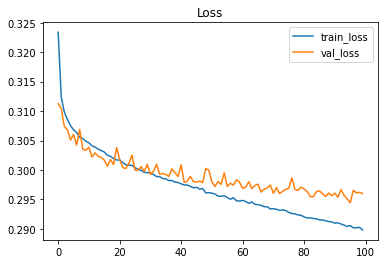

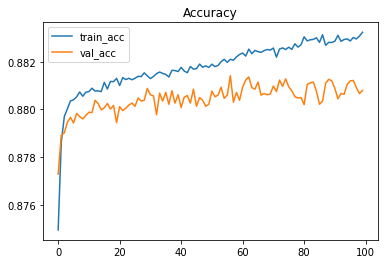

In [9]:
import matplotlib.pyplot as plt
# history 객체에서 손실값과 정확도를 추출합니다.
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# 손실값 그래프
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.legend()
plt.title('Loss')
plt.show()

# 정확도 그래프
plt.plot(train_acc, label='train_acc')
plt.plot(val_acc, label='val_acc')
plt.legend()
plt.title('Accuracy')
plt.show()
